# ShopEasy AI Project

Members of the group:
- Yassir El Arrag
- Leonardo Farfan
- Shefik Memedi

# 1. Introduction

For our project, we've chosen the **ShopEasy** dataset, which captures the purchasing patterns and behaviors of the platform's users. Our main objective in analyzing this data is to develop a model that can segment and group customers based on their information. This will enable us to improve the user experience and offer more relevant promotions and services.

ShopEasy attempts to use this dataset to segment the dataset, to uncover hidden patterns and provide an enhanced, personalized shopping experience for its users. This means that we are working with a clustering problem.

# 2. Exploratory data analysis (EDA)
In any data analysis project, the initial phase involves exploring the dataset. This includes removing duplicated values, handling outliers, and addressing missing data. Furthermore, we will describe the distribution of some variables and investigate relationships between them.

In [1]:
# Import basic libraries needed for this part
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 2.1. Importing the data


The initial step in our exploratory data analysis is to visualize the attributes in our dataset. This will help us gain a solid understanding of the data and provide initial insights into which variables might be most relevant for our analysis. To begin, we will load the data into a Pandas dataframe named `shopEasy_df`.

In [2]:
shopEasy_df = pd.read_csv("shopEasy.csv")
shopEasy_df.head(5)

,personId,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,...,emergencyCount,itemCount,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,location,accountType,webUsage
0,C10573,1034.660626,0.833333,1308.11,1308.11,0.00,234.602843,0.500000,0.500000,0.000000,...,1,8,1500.0,236.764555,207.007715,0.00,6,New York,Premium,60
1,C16889,777.853474,0.666667,0.00,0.00,0.00,1820.143378,0.000000,0.000000,0.000000,...,8,0,2000.0,89.741508,173.276205,0.00,6,Los Angeles,Premium,5
2,C12964,97.453056,0.818182,334.73,334.73,0.00,19.551802,0.083333,0.083333,0.000000,...,1,1,2500.0,234.271939,117.297542,0.25,12,New York,Student,21
3,C11171,0.000000,0.000000,12.65,0.00,12.65,0.000000,0.083333,0.000000,0.083333,...,0,1,5000.0,0.000000,NaN,0.00,12,Chicago,Premium,53
4,C17582,18.120946,0.500000,57.00,57.00,0.00,0.000000,0.166667,0.166667,0.000000,...,0,1,1500.0,118.438703,54.138711,0.00,6,New York,Premium,59


In [3]:
shopEasy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personId                  8950 non-null   object 
 1   accountTotal              8950 non-null   float64
 2   frequencyIndex            8950 non-null   float64
 3   itemCosts                 8950 non-null   float64
 4   singleItemCosts           8950 non-null   float64
 5   multipleItemCosts         8950 non-null   float64
 6   emergencyFunds            8950 non-null   float64
 7   itemBuyFrequency          8950 non-null   float64
 8   singleItemBuyFrequency    8950 non-null   float64
 9   multipleItemBuyFrequency  8950 non-null   float64
 10  emergencyUseFrequency     8950 non-null   float64
 11  emergencyCount            8950 non-null   int64  
 12  itemCount                 8950 non-null   int64  
 13  maxSpendLimit             8949 non-null   float64
 14  monthlyP

From our initial observation of the dataset, it appears that most of the variables are numerical, with the exceptions of `personId`, `acountType`, and `location`. `PersonId` serves as an identifier for each ShopEasy user, `accountType` describes the type of user account, and `location` specifies the user's geographical location. 

It's important to note that there are missing values in certain features of our dataset, particularly in the `leastAmountPaid` and `maxSpendLimit` columns. 

In the next section, we will focus on these specific columns to determine whether the missing values can be imputed.

## 2.2. Checking for data integrity

In this section, we will examine our dataset for missing values and duplicated rows. We will also identify outliers in each feature. However, since we are addressing a **clustering** problem rather than a regression problem, the presence of outliers may not significantly impact our model's results. In clustering, observations with outliers do not generally pose a substantial issue. In clustering, outliers can sometimes even help in identifying unique groups or behaviors within the data.

### 2.2.1. Checking for missing values


In this section, we will address the missing values in our dataset. Handling missing data is essential for maintaining the accuracy and reliability of the insights derived from the dataset. The initial step involves identifying and quantifying the missing values in each column of our dataframe.

In [4]:
missing_values = shopEasy_df.isnull().sum()
missing_values

personId                      0
accountTotal                  0
frequencyIndex                0
itemCosts                     0
singleItemCosts               0
multipleItemCosts             0
emergencyFunds                0
itemBuyFrequency              0
singleItemBuyFrequency        0
multipleItemBuyFrequency      0
emergencyUseFrequency         0
emergencyCount                0
itemCount                     0
maxSpendLimit                 1
monthlyPaid                   0
leastAmountPaid             313
paymentCompletionRate         0
accountLifespan               0
location                      0
accountType                   0
webUsage                      0
dtype: int64

The results confirm our previous remark, there are two columns with missing values, `leastAmountPaid` with **313** rows affected and `maxSpendLimit` with only one affected row.

Since it's only one row with a missing value for `maxSpendLimit`, we decided to remove that observation.

In [5]:
shopEasy_df.dropna(subset=['maxSpendLimit'], inplace=True)

In the next step, we aim to explore whether the missing data in the `leastAmountPaid` column correlates with the distribution of other columns. This analysis helps us understand potential reasons behind the missing values and guides our approach for handling them effectively. We will create a dataframe that includes only the rows with missing values in the `leastAmountPaid` column. Using this filtered dataset, we'll plot histograms for the `accountTotal` and `itemCount` to analyze their distributions. Our hypothesis is that if a user has not made any purchases, then the least amount paid should logically be **0**. Conversely, if purchases were made, examining both `accountTotal` and `itemCount` could provide insights into the average amount paid per transaction, which might be used to impute missing values in the `leastAmountPaid` column.

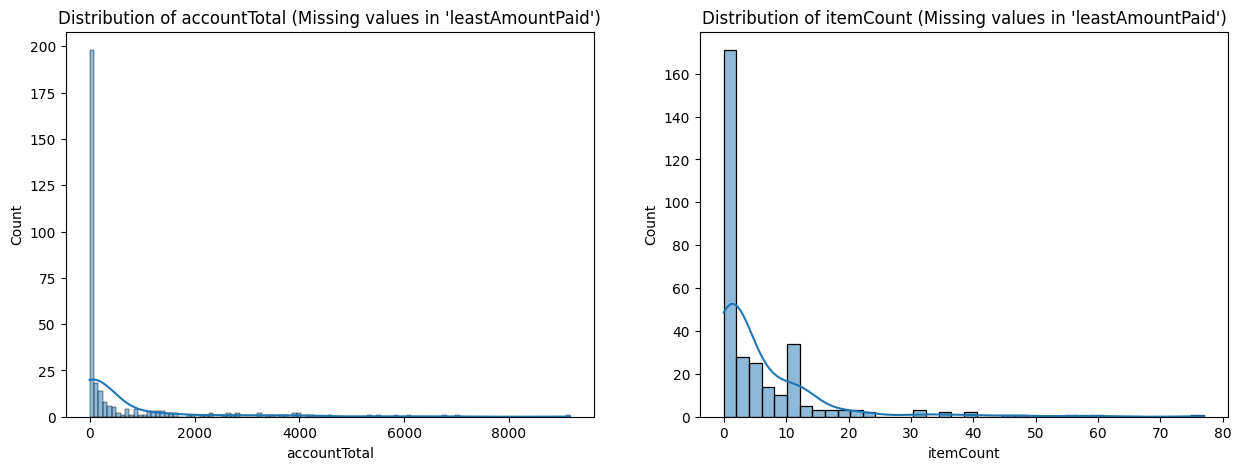

In [6]:
rows_affected = shopEasy_df[shopEasy_df['leastAmountPaid'].isnull()]

columns = ['accountTotal', 'itemCount']

fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

for i, col in enumerate(columns):
    sns.histplot(rows_affected, x = col, ax = axes[i], kde = True)
    axes[i].set_title(f"Distribution of {col} (Missing values in 'leastAmountPaid')")


From the plots, it's evident that a large number of users have not purchased any items from the platform, indicating that their minimum amount paid should logically be **0**. We will proceed by imputing the missing values in the `leastAmountPaid` column with 0 for all observations where `itemCount` is zero. For cases where `itemCount` is not zero, we will calculate and use the average amount paid per item to fill in the missing values.

In [7]:
condition = (shopEasy_df['leastAmountPaid'].isnull()) & (shopEasy_df['itemCount'] == 0)
shopEasy_df.loc[condition, 'leastAmountPaid'] = 0

condition = (shopEasy_df['leastAmountPaid'].isnull()) & (shopEasy_df['itemCount'] != 0)
shopEasy_df.loc[condition, 'leastAmountPaid'] = shopEasy_df.loc[condition, 'accountTotal']/shopEasy_df.loc[condition, 'itemCount']

### 2.2.2. Checking for duplicated rows

Next, we will identify and remove any duplicated rows in our dataset. This step ensures that our data is free of redundancies, which can improve the accuracy and reliability of our analysis.

In [8]:
duplicated_rows_df = shopEasy_df[shopEasy_df.duplicated()]
duplicated_rows_df

,personId,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,...,emergencyCount,itemCount,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,location,accountType,webUsage


Since it returned an empty dataframe, then we are sure that the dataset doesn't have any duplicated rows.

### 2.2.3. Inspecting for outliers

In this phase of the exploratory data analysis, we will examine data points that significantly diverge from the majority of data points in the dataset. These outliers can skew statistical measures like the mean and standard deviation, resulting in misleading data summaries. 

In our analysis, we have two categorical variables that each have a specific set of possible values. The first step is to verify that these variables contain only valid data points. If we find any values in these categorical variables that do not match their predefined set of possible values, we will remove the rows containing these erroneous entries. This approach helps ensure data integrity and reliability in our dataset.

In [9]:
location_values = set(shopEasy_df["location"].values)

print(location_values)

accountType_values = set(shopEasy_df["accountType"].values)

print(accountType_values)

{'Los Angeles', 'Chicago', 'New York'}
{'Student', 'Regular', 'Premium'}


It appears that there are no outliers in the `location` and `accountType` variables. Additionally, there's no need to check for outliers in the `accountId` variable since each user (row) has a unique identifier, ensuring that each new row contains a new value for the `accountId` variable. Next, we will count the number of outliers for each numerical feature of our data. The code below uses the the first and the third quartiles to find the outlier values for each column, it saves the `personIds` of the rows that have a value outside the range 
$(Q1-1.5*IQR,\ Q3+1.5*IQR)$ for each column in a dictionary `outliers_per_column`.

In [10]:
categorical_var = ["location", "accountType", "personId"]

# we save the statistical results of the dataframe's columns
statistical_values = shopEasy_df.describe()

# We store the numerical features in a list
numeric_columns = [col for col in shopEasy_df.columns if col not in categorical_var]

# we create a dictionary that saves for each column a list of accountIds that point to the rows that are affected by an outlier
outliers_per_column = {}

# We iterate over the columns
for col in numeric_columns:
    # We save the first and third quantile of the column 
    q1 = statistical_values[col]["25%"]
    q3 = statistical_values[col]["75%"]
    
    # we save the rows affected by an outlier value
    outliers_df = shopEasy_df[(shopEasy_df[col] < q1-1.5*(q3-q1)) | (shopEasy_df[col] > q3+1.5*(q3-q1) )]
    
    # we save the personIds
    outliers_per_column[col] = list(outliers_df["personId"])

# For each column we print the number of outliers and we save all users, that gave an outlier in at least on column, in a list
persons_list = []
for col in outliers_per_column:
    print(f"{col} : {len(outliers_per_column[col])} outliers")
    persons_list += outliers_per_column[col]

# we create a set that contains the users with outliers
persons_with_outliers = set(persons_list)

accountTotal : 695 outliers
frequencyIndex : 1492 outliers
itemCosts : 808 outliers
singleItemCosts : 1013 outliers
multipleItemCosts : 867 outliers
emergencyFunds : 1030 outliers
itemBuyFrequency : 0 outliers
singleItemBuyFrequency : 782 outliers
multipleItemBuyFrequency : 0 outliers
emergencyUseFrequency : 525 outliers
emergencyCount : 804 outliers
itemCount : 766 outliers
maxSpendLimit : 248 outliers
monthlyPaid : 808 outliers
leastAmountPaid : 894 outliers
paymentCompletionRate : 1474 outliers
accountLifespan : 1365 outliers
webUsage : 0 outliers


As we can see from the result, almost all the features have a significant number of outliers, we suppose that the reason of these results lies behind the existence of a group of users that have outlier values for more than one feature, consequently these users might belong to the same cluster so it will be more usefull if we save these outliers rather than deleting them. To verify our hypothesis, in the following parts we will count how many outliers values a user has.
The following code snippet computes the count of outlier values present in each observation's columns, where each observation corresponds to a user. The output of this code is a series that records, for each `personId`, the number of outliers detected.

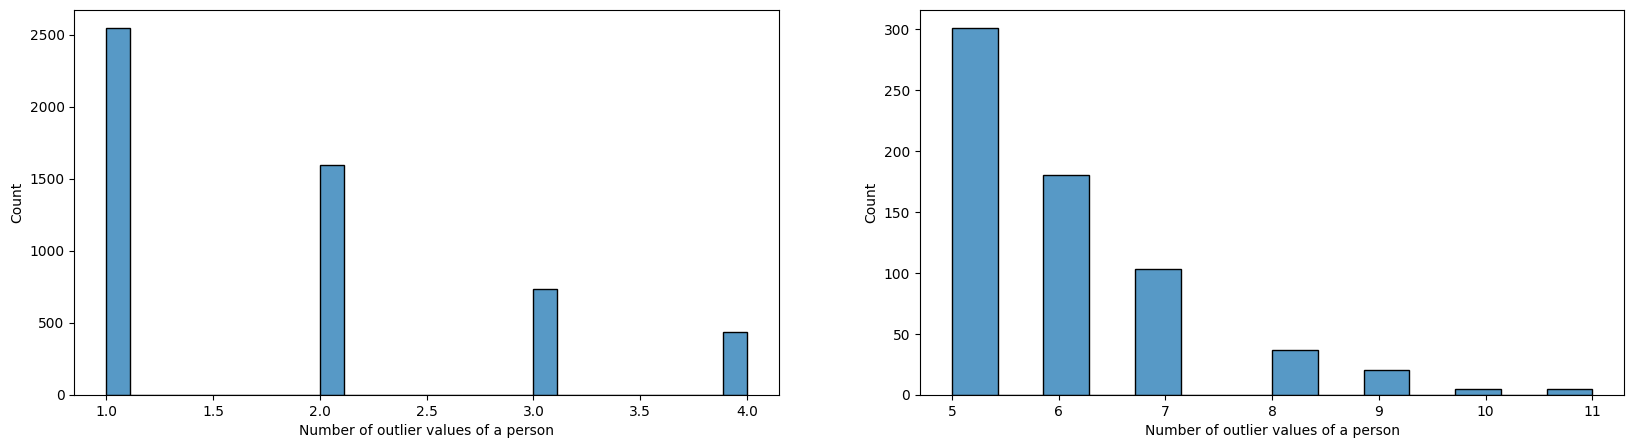

In [11]:
# we create a dictionary that saves for each user, the number of outlier values
num_outliers_per_person = {}

# We use the set 'persons_with_outliers' to iterate over the users
for person in persons_with_outliers:
    c = 0
    # For each user we count the number of outliers
    for col in outliers_per_column:
        if person in outliers_per_column[col]:
            c += 1
    num_outliers_per_person[person] = c

persons = pd.Series(num_outliers_per_person, name="Number of outlier values of a person")

# We plot the distribution of the number of columns affected by outliers
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
sns.histplot(data=persons[persons <= 4], ax=axes[0])
sns.histplot(data=persons[persons > 4], ax=axes[1])
plt.show()

The histograms indicate that over 300 users exhibit outlier values in more than 5 features, while more than 2500 users have outlier values in at least one feature. These findings lend support to our hypothesis suggesting the presence of a group of users sharing uncommon characteristics. Consequently, removing these observations may compromise the accuracy of our clustering model.

## 2.3. Visualization of the distributions of single variables:

We will start by analyzing the distribution of single variables. First we deal with the quantitative features then we move to the categorical ones. As expected it is not convenient to inspect each variable of our dataset, so we will take a look to a sample of them that will include the features that seem relevant for our objective.

### 2.3.1. The `accountTotal` variable

We'll start our exploration with the `accountTotal` variable, which denotes the total expenditure made by each user on the platform.

Text(0.5, 1.0, 'Boxplot of accountTotal')

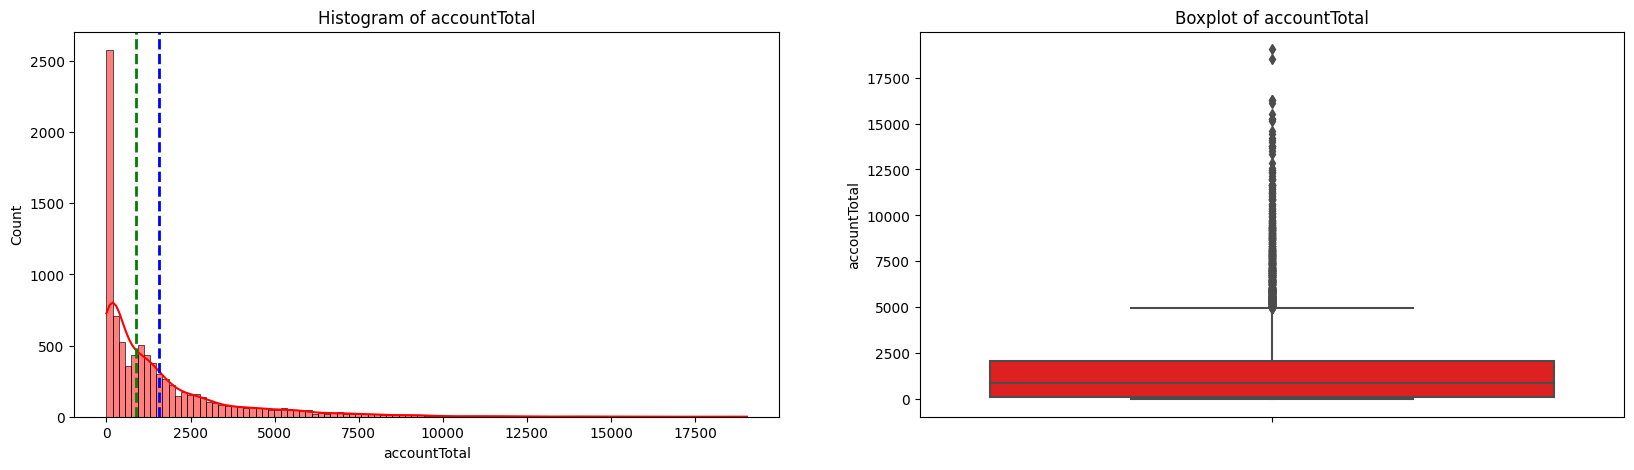

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
 
# We save the first and third quantile of our variable
q1 = statistical_values["accountTotal"]["25%"]
q3 = statistical_values["accountTotal"]["75%"]

# We plot a histogram for the distribution of our variable, we also draw vertical lines that refers to the mean and median
sns.histplot(data = shopEasy_df, x = "accountTotal", kde = True, ax = axes[0], color = "red")
axes[0].set_title("Histogram of accountTotal")
axes[0].axvline(shopEasy_df["accountTotal"].mean(), color='blue', linestyle='dashed', linewidth=2) 

# We create a boxplot for our variable
axes[0].axvline(shopEasy_df["accountTotal"].median(), color='green', linestyle='dashed', linewidth=2)
sns.boxplot(shopEasy_df, y = "accountTotal",ax =axes[1], color = "red")
axes[1].set_title("Boxplot of accountTotal")


The variable of interest, `accountTotal`, exhibits a right-skewed distribution, with mean and median values approximately equal to 1500 and 900 Dollars, respectively. According to the boxplot, 75% of the users have spent less than 2500 Dollars, while the outlier region begins at approximately 5000 Dollars. 

### 2.3.2. The `maxSpendLimit` variable

Text(0.5, 1.0, 'Boxplot of maxSpendLimit')

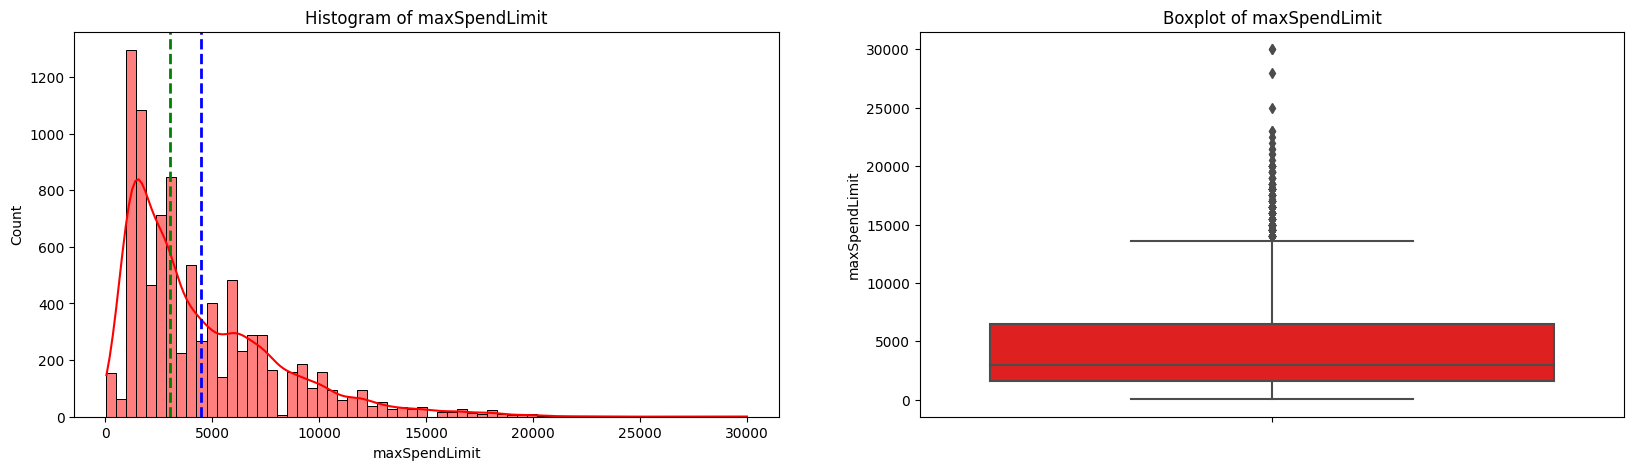

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

q1 = statistical_values["maxSpendLimit"]["25%"]
q3 = statistical_values["maxSpendLimit"]["75%"]
sns.histplot(data = shopEasy_df, x = "maxSpendLimit", kde = True, ax = axes[0], color = "red")
axes[0].set_title("Histogram of maxSpendLimit")
axes[0].axvline(shopEasy_df["maxSpendLimit"].mean(), color='blue', linestyle='dashed', linewidth=2) 
axes[0].axvline(shopEasy_df["maxSpendLimit"].median(), color='green', linestyle='dashed', linewidth=2)

sns.boxplot(shopEasy_df, y = "maxSpendLimit",ax =axes[1], color = "red")
axes[1].set_title("Boxplot of maxSpendLimit")

Similar to the previous feature, the `maxSpendLimit` variable exhibits a right-skewed distribution. The boxplot indicates that the highest amount most users spend in a single transaction is 6500 Dollars.

### 2.3.3 The `location` and `accountType` variables

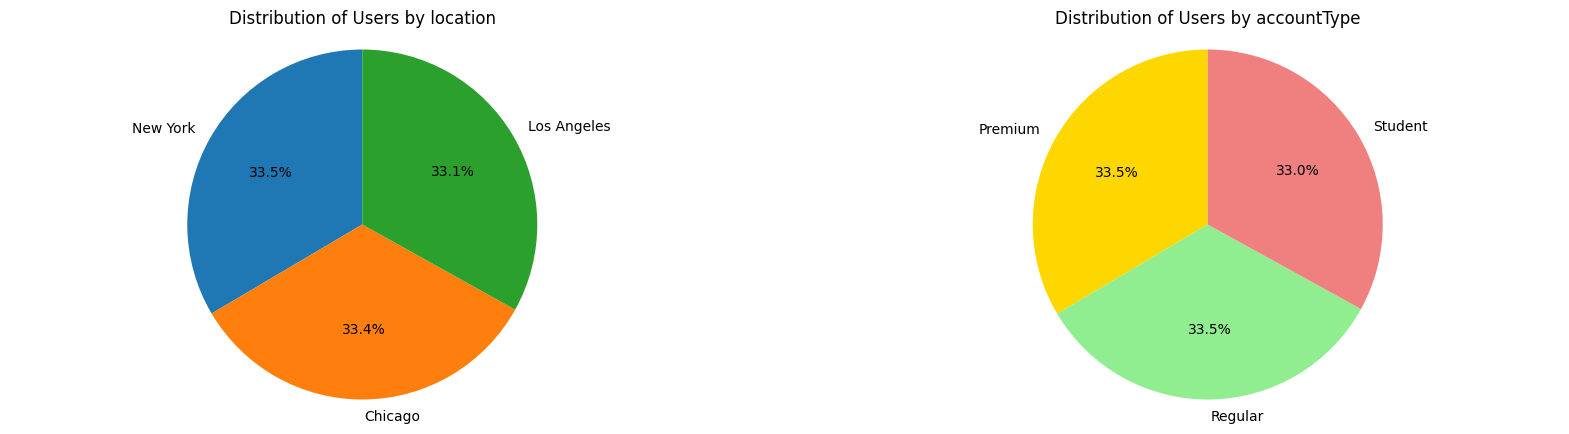

In [14]:
# We count for each city the number of observation that belong to it
city_counts = shopEasy_df['location'].value_counts()
# We count for each type the number of observation that belong to it
account_types = shopEasy_df['accountType'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

# we use a pie plot to visualize the results
axes[0].pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].axis('equal') 
axes[0].set_title('Distribution of Users by location')


axes[1].pie(account_types, labels=account_types.index, colors = ['gold', 'lightgreen', 'lightcoral'], autopct='%1.1f%%', startangle=90)
axes[1].axis('equal') 
axes[1].set_title('Distribution of Users by accountType')

plt.show()

The pie chart demonstrates that the distribution of the **location** variable is balanced, with each city accounting for one third of the total observations. Similarly, the distribution of the `accountType` is fairly even.

## 2.4. Bivariate Analysis:

In this section, we’ll explore the relationships between features by examining various combinations of variables. Initially, we’ll use pair plots to analyze relationships between pairs of continuous variables. Afterwards, we’ll investigate associations between categorical and continuous variables, aiming to identify any distinctions or trends within each group of variables.

### 2.4.1. Correlations

We will start by looking to the correlation matrix of our numerical features.

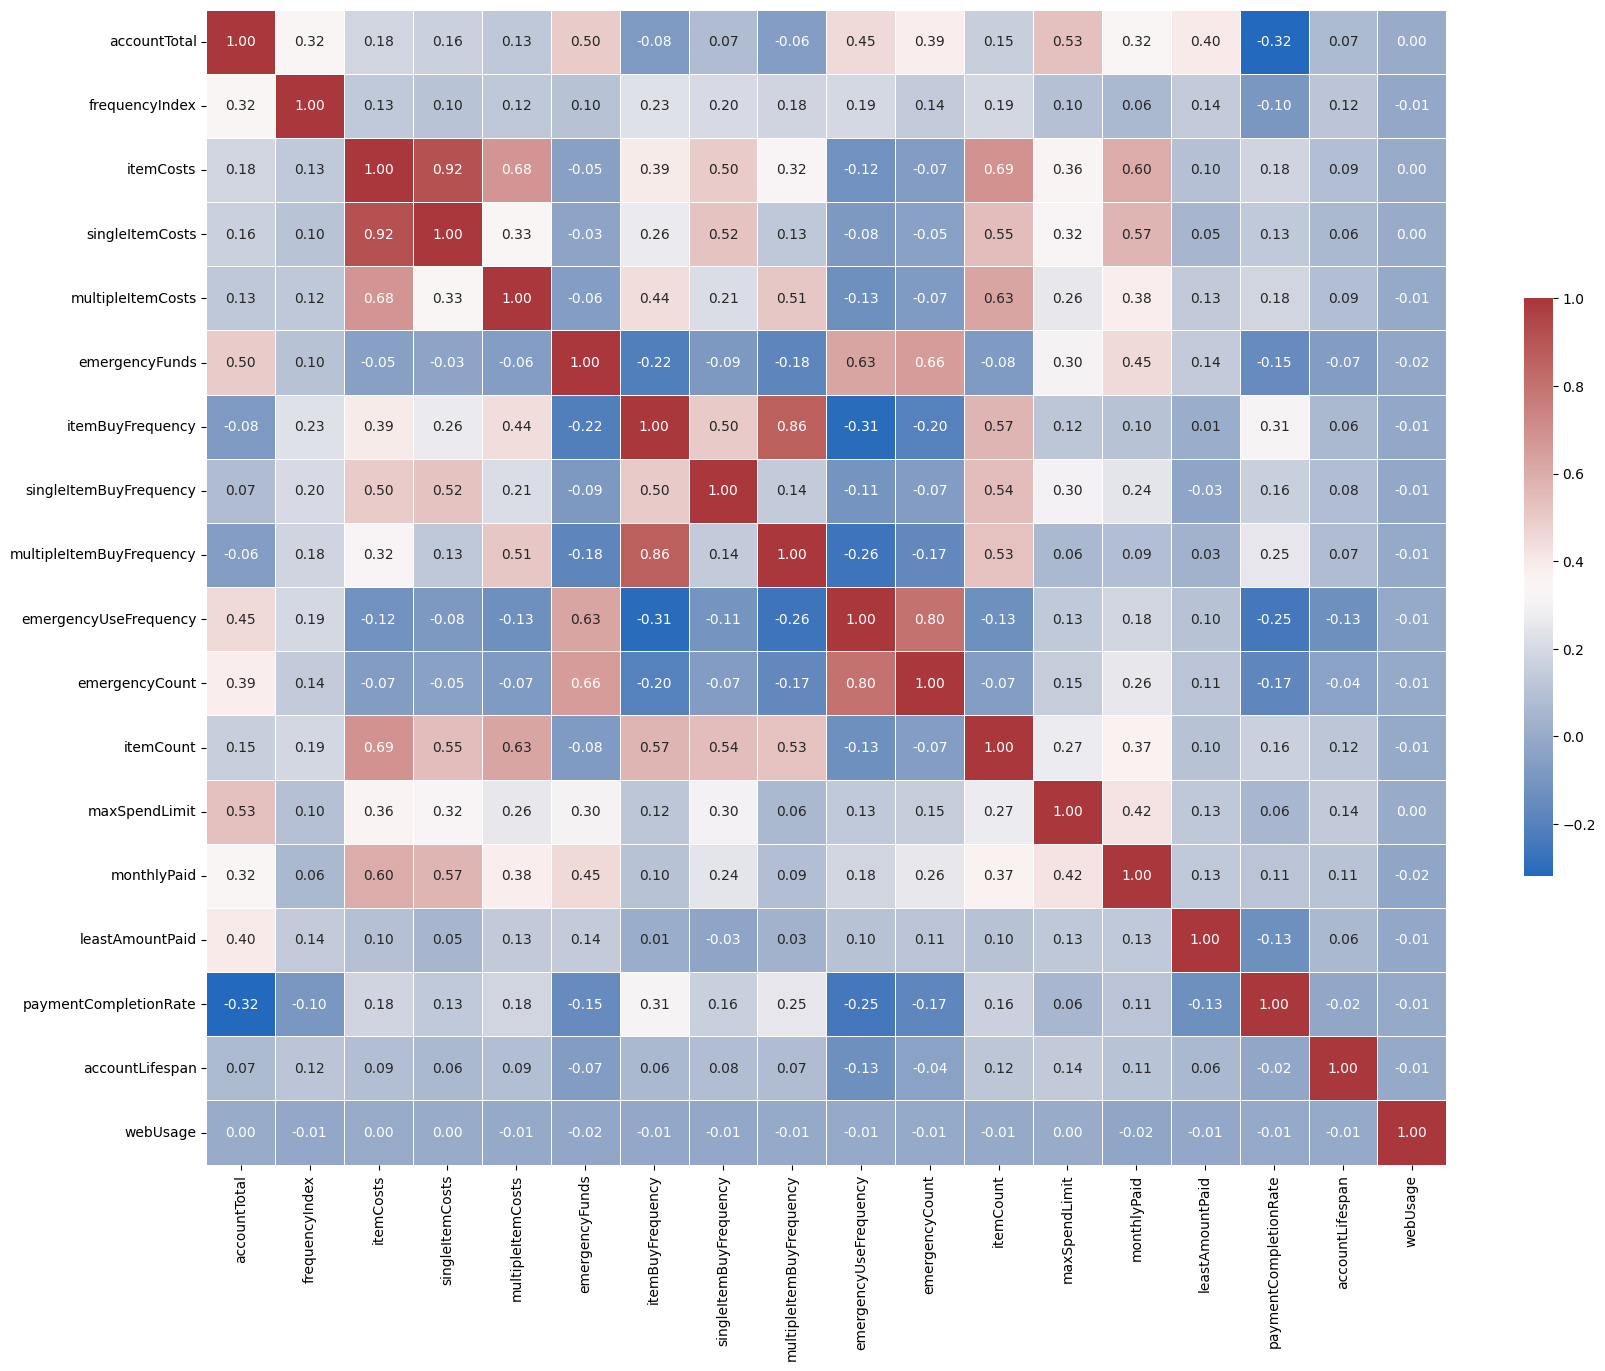

In [15]:
correlation_matrix = shopEasy_df.corr(numeric_only=True)

plt.figure(figsize=(20, 15))
cmap = sns.color_palette("vlag", as_cmap=True)

ax = sns.heatmap(correlation_matrix, cmap=cmap, annot=True, fmt=".2f",linewidths=.5, cbar_kws={"shrink": .5})


### 2.4.2. `accountTotal` vs `frequencyIndex`, `emergencyFunds`, `maxSpendLimit`, `leastAmountPaid`

Here, we explore the connections between `accountTotal` and related variables including `frequencyIndex`, `emergencyFunds`, `maxSpendLimit`, and `leastAmountPaid`. These metrics are vital for categorizing users based on their spending patterns.

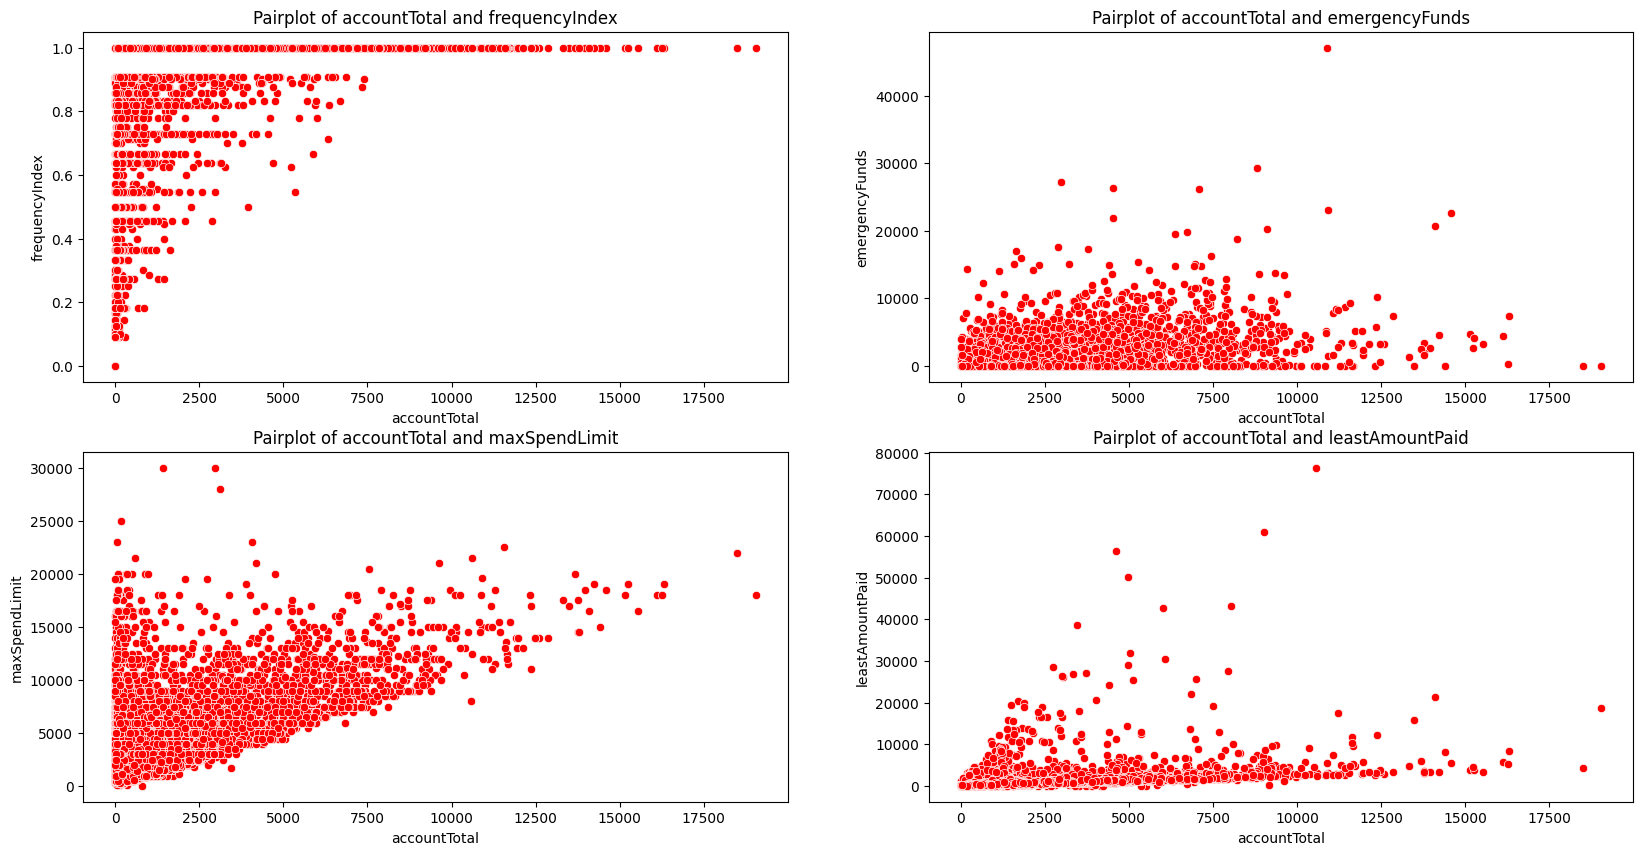

In [16]:
colStudy = ["frequencyIndex", "emergencyFunds", "maxSpendLimit", "leastAmountPaid"] # We select the columns to study

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

c = 0
j = 0
for i, col in enumerate(colStudy):
    if i == 2:
        j+=1
    if c == 2:
        c = 0
    sns.scatterplot(data = shopEasy_df, x = "accountTotal", y = col, ax=axes[j,c], color="red")
    axes[j,c].set_title(f"Pairplot of accountTotal and {col}")
    c +=1

From the plot, we observe that users who spend less frequently typically have a total expenditure of less than approximately $7,500 on the platform. Conversely, users who have spent more than $7,500 are consistently very frequent users. This pattern highlights a clear relationship between spending levels and user engagement. 

Similarly, users who have spent more on the platform generally show a higher estimated maximum amount available for a single purchase. Conversely, frequency of use does not necessarily linearly correlate with larger emergency funds, as there is no notable difference in `emergencyFunds` between users who spend less and those who spend more. 

### 2.4.3. `accountTotal` vs `location`, `accountType`

In this section, we will explore the relationship between the total amount spent, location, and account type. Specifically, we will calculate the total spending by each account type within each city to understand how spending behavior varies across different locations and user segments.

In [17]:
amountPerLocation = pd.DataFrame({
    "accountTotal": [],
    "location" : [],
    "accountType" : []
})

for l in location_values: # For each account type we count the total amount spent whithin each city
    for t in accountType_values:
        condition = (shopEasy_df["location"] == l) & (shopEasy_df["accountType"] == t) 
        accTotal = round(shopEasy_df.loc[condition, "accountTotal"].sum())
        new_row = pd.DataFrame({"accountTotal": [accTotal], "location": [l], "accountType":[t]})
        amountPerLocation = pd.concat([amountPerLocation, new_row], ignore_index=True)


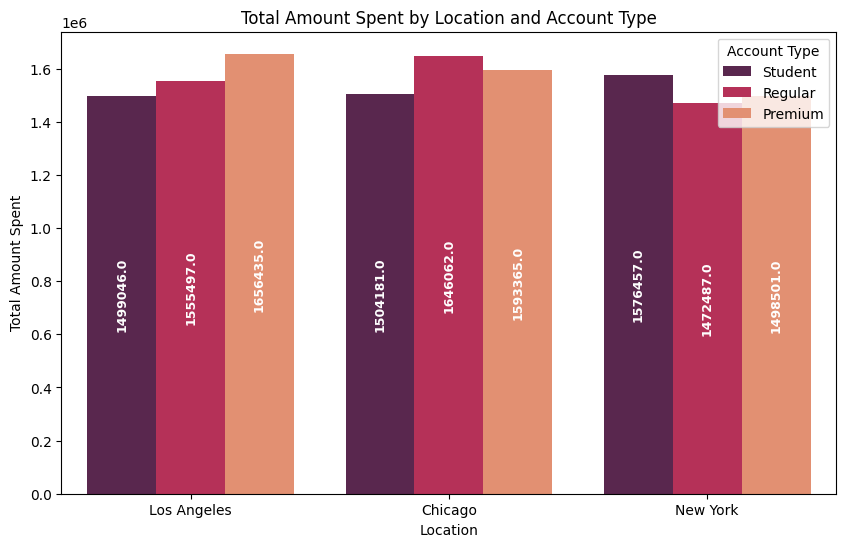

In [18]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=amountPerLocation, x='location', y='accountTotal', hue='accountType', palette='rocket')

plt.xlabel('Location')
plt.ylabel('Total Amount Spent')
plt.title('Total Amount Spent by Location and Account Type')
plt.legend(title='Account Type')

for p in ax.patches:
    # Get the height and the width of the bar (total amount spent)
    height = p.get_height()
    width = p.get_width()
    # Placing the text at the top center of the bar, adjusting for zero heights
    ax.text(p.get_x() + width / 2, height / 2, f'{height}', ha='center', va='center', color='white', fontsize=9, fontweight='bold', rotation=90)

plt.show()

The analysis reveals that the overall spending by users is consistent across different cities. However, the spending patterns vary significantly by account type within each city. For instance, in New York, users holding **Student** accounts are the highest spenders, whereas in Chicago, those with **Regular** accounts lead in spending. In Los Angeles, **Premium** account holders spend the most. This variation highlights the diverse financial behaviors influenced by both geographic location and the type of account held by users.

## 2.5. Data Pre-Processing

We use One-Hot Encoding to enconde the categorical variables remaining, as requested in the project instructions. This is not needed for clustering problems, since we don't use categorical variables.

In [19]:
# Use One-Hot Encoding to encode the categories
shopEasy_df_dummies = pd.get_dummies(shopEasy_df, columns=categorical_var)

Now, we scale the numerical variables using `StandardScaler()` from `sklearn`. 

In [20]:
from sklearn.preprocessing import StandardScaler

shopEasy_onlyNumerical_df = shopEasy_df.drop(categorical_var, axis=1)


scaler = StandardScaler()
shopEasy_scaledNumerical_df = scaler.fit_transform(shopEasy_onlyNumerical_df)

# 3. Clustering Models

For our clustering models, we will use PCA for dimensionality reduction in order to visualize the clustering results in 2D and 3D plots.

In [21]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [22]:
# PCA Implementation
pca = PCA(n_components=2)
principal_components = pca.fit_transform(shopEasy_scaledNumerical_df)
principal_df = pd.DataFrame(data=principal_components, columns = ["PC1", "PC2"])

In [23]:
# PCA 3D Implementation
pca_3d = PCA(n_components=3)
principal_components_3d= pca_3d.fit_transform(shopEasy_scaledNumerical_df)
principal_3d_df = pd.DataFrame(data=principal_components_3d, columns = ["PC1", "PC2", "PC3"])

## 3.1. K-Means

We start by using K-Means on the dataset. The first step is to find which is the right `k` parameter for the model, so we run it multiple times with different `k` parameters, and compute the WCSS and Silhouette scores.

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Since K-Means' intialization is random, for every `k`, we run the model 10 times, and then average the results. We test the model for `k` values from 2 to 20.

In [25]:
k_means_scores_df = pd.DataFrame(columns=['k', 's_score', 'wcss_score'])

for k in range(2,21):
  current_silhouette_all = []
  current_wcss_all = []
  for n in range(1,11):
    model = KMeans(n_clusters = k, init='random', n_init = 'auto')
    model.fit(shopEasy_scaledNumerical_df)
    predicted_classes = model.labels_
    current_wcss_all.append(model.inertia_)
    current_silhouette_all.append(silhouette_score(shopEasy_scaledNumerical_df, predicted_classes))
  results = pd.DataFrame({'k': [k], 's_score': [sum(current_silhouette_all)/10], 'wcss_score': [sum(current_wcss_all)/10]})
  k_means_scores_df = pd.concat([k_means_scores_df, results], ignore_index=True)

k_means_scores_df.set_index('k', inplace=True)

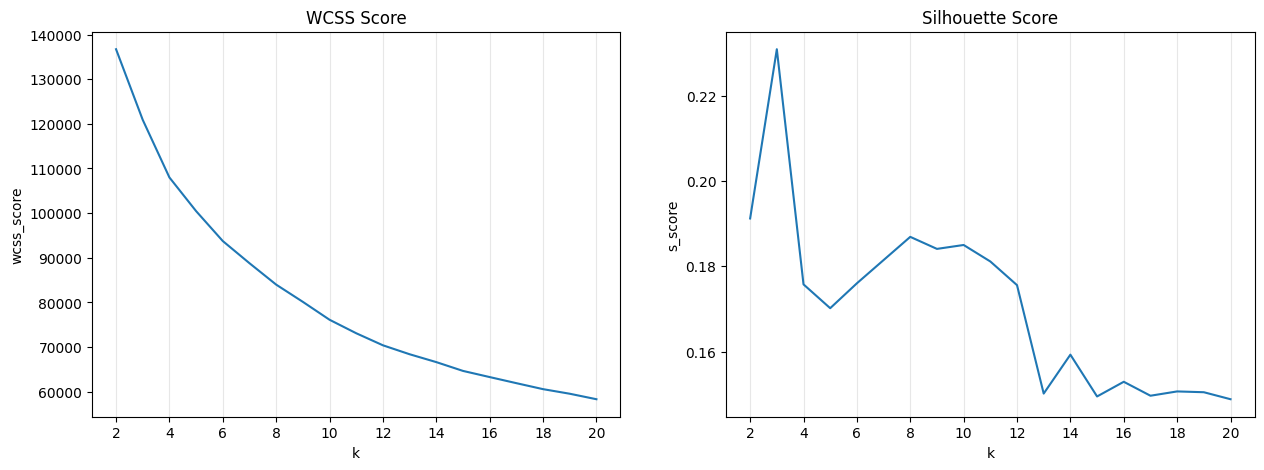

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.lineplot(data=k_means_scores_df, x='k', y='wcss_score', ax=axes[0])
axes[0].set_title("WCSS Score")
axes[0].set_xticks(ticks=range(2,21,2))
axes[0].grid(axis='x', alpha=0.3)
sns.lineplot(data=k_means_scores_df, x='k', y='s_score')
axes[1].set_title("Silhouette Score")
axes[1].set_xticks(ticks=range(2,21,2))
axes[1].grid(axis='x', alpha=0.3)
plt.show()

For the WCSS Score, we don't observe a clear *elbow* in order to apply the Elbow Method. If we take a look at the Silhouette Score, we will observe a pronounced peak at $k=3$. Based on this, we select 3 as the `k` for our model, and we run it below.

In [27]:
k = 3
model = KMeans(n_clusters=k, init='random', n_init='auto')
model.fit(shopEasy_scaledNumerical_df)
predicted_classes = model.labels_
unique_labels = np.unique(predicted_classes)

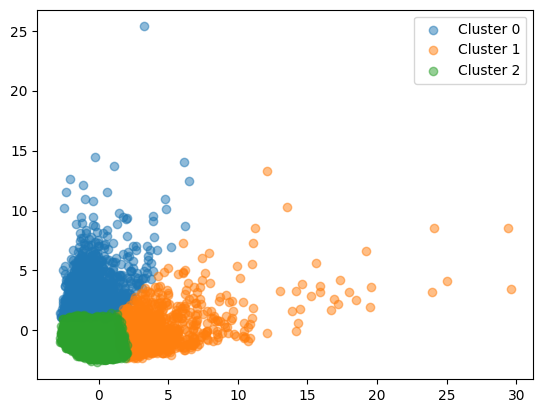

In [28]:
fig, ax = plt.subplots()
for cls in unique_labels:
  class_indices = predicted_classes == cls
  ax.scatter(principal_df.loc[class_indices, "PC1"], principal_df.loc[class_indices, "PC2"], alpha=0.5, label="Cluster "+str(cls))
ax.legend();

We plot the clustering results in 2 dimensions thanks to PCA dimensionality reduction. We can observe three clearly defined clusters, with some *outliers* expanding from around 10 in both axes.

## 3.2. Hierarchical Clustering

First of all, we use SciPy's hierarchical clustering library in order to give us a quick overview of the potential clusters that can be formed with our dataset. This information will be useful when we implement the actual models with `sklearn`. 

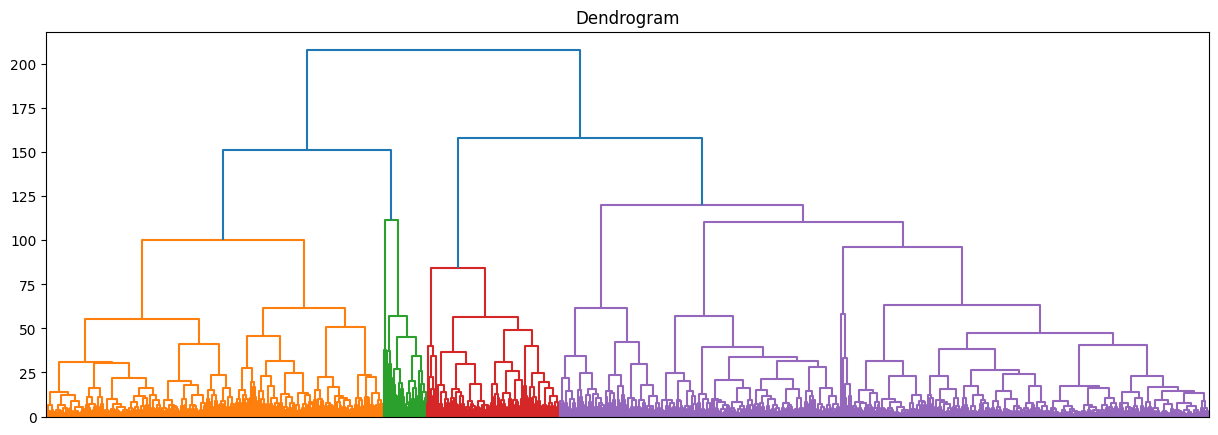

In [29]:
import scipy.cluster.hierarchy as sch

fig, ax = plt.subplots(figsize= (15,5))
linkage_method = sch.linkage(shopEasy_scaledNumerical_df, method = 'ward', metric = 'euclidean') # method = {'single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward'}
dendrogram = sch.dendrogram(linkage_method, ax = ax)
ax.set_title('Dendrogram')
ax.set_xticks([])
plt.show()


Now we implement `sklearn`'s `AgglomerativeClustering` model. Similarly to what we did for K-Means, we test the model for `k` values ranging from 2 to 40, and we plot the Silhouette scores resulting from every `k` tested.

In [30]:
from sklearn.cluster import AgglomerativeClustering

hc_scores_df = pd.DataFrame(columns=['k', 's_score'])
silhouette_scores = []

for k in range(2,41):
    hierarchy_model = AgglomerativeClustering(n_clusters = k, metric = 'euclidean', linkage = 'ward')
    lbl_predicted = hierarchy_model.fit_predict(shopEasy_scaledNumerical_df)
    score = silhouette_score(shopEasy_scaledNumerical_df, lbl_predicted)
    silhouette_scores.append(score)
    results = pd.DataFrame({'k': [k], 's_score': [score]})
    hc_scores_df = pd.concat([hc_scores_df, results], ignore_index=True)


<Axes: xlabel='k', ylabel='s_score'>

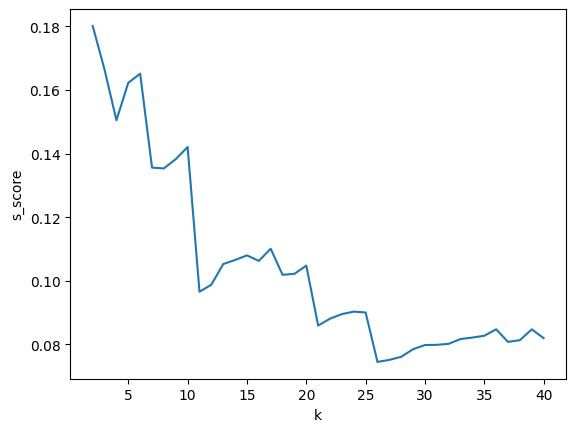

In [31]:
sns.lineplot(data=hc_scores_df, x='k', y='s_score')

As clearly seen from the graph, the best `k` found, based on the Silhouette score is $k=2$, which is the value to be used for our model below.

In [32]:
best_k = silhouette_scores.index(max(silhouette_scores)) + 2

hierarchy_model = AgglomerativeClustering(n_clusters = best_k, metric = 'euclidean', linkage = 'ward')
lbl_predicted = hierarchy_model.fit_predict(shopEasy_scaledNumerical_df)


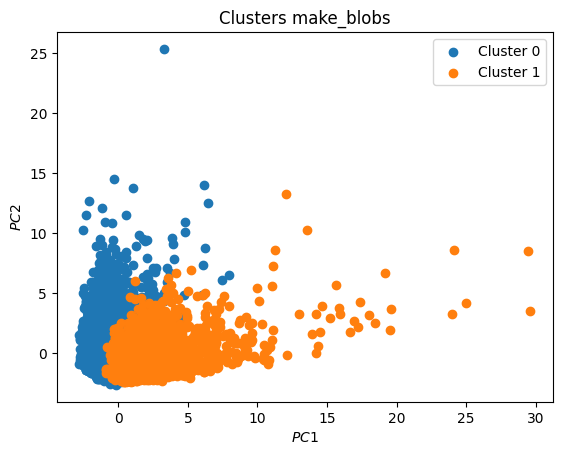

In [33]:
fig, ax = plt.subplots()
unique_labels = np.unique(lbl_predicted)

principal_df["cluster"] = lbl_predicted

for cl in unique_labels:
  ax.scatter(principal_df[principal_df["cluster"] == cl]["PC1"], principal_df[principal_df["cluster"] == cl]["PC2"], label = f'Cluster {cl}')

ax.set_title('Clusters make_blobs')
ax.set_xlabel(r'$PC1$')
ax.set_ylabel(r'$PC2$')
ax.legend();


In this pairplot, again plotted in 2 dimensions thanks to a reduction with PCA, we can observe two clusters that overlap (in this two-dimensional view).

## 3.3. DBSCAN

Finally, we explore DBSCAN, as a non-linear alternative to our other two linear clustering models that we tested before. Due to the multidimensionality of our dataset, we cannot really know beforehand if there are any non-linear shapes that we can better identify with DBSCAN, so we implemented it to see how it performs with our dataset.

In [34]:
from sklearn.cluster import DBSCAN

Below, we run the model, testing `eps` values from 0.2 to 4.0 with steps of 0.2, and `min_samples` values ranging from 2 to 7. For this exploration, we need to implement nested for loops, so the process to explore the parameters is computationally expensive. Once again, we use the Silhouette score to measure the performance of the model.

In [35]:
eps_values = np.arange(0.2,4.3,0.2).tolist()
eps_values = [round(x, 1) for x in eps_values]
min_samples_values = list(range(2,8,1))
silhouette_scores = []
num_clusters = []

for eps in eps_values:
  current_s_scores = []
  current_num_clusters = []
  for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(shopEasy_scaledNumerical_df)
    unique_clusters = np.unique(clusters)
    if len(unique_clusters)==1:
      current_s_scores.append(np.nan)
      current_num_clusters.append(len(unique_clusters))
      continue
    current_s_scores.append(silhouette_score(shopEasy_scaledNumerical_df, clusters))
    current_num_clusters.append(len(unique_clusters))
  silhouette_scores.append(current_s_scores) 
  num_clusters.append(current_num_clusters)

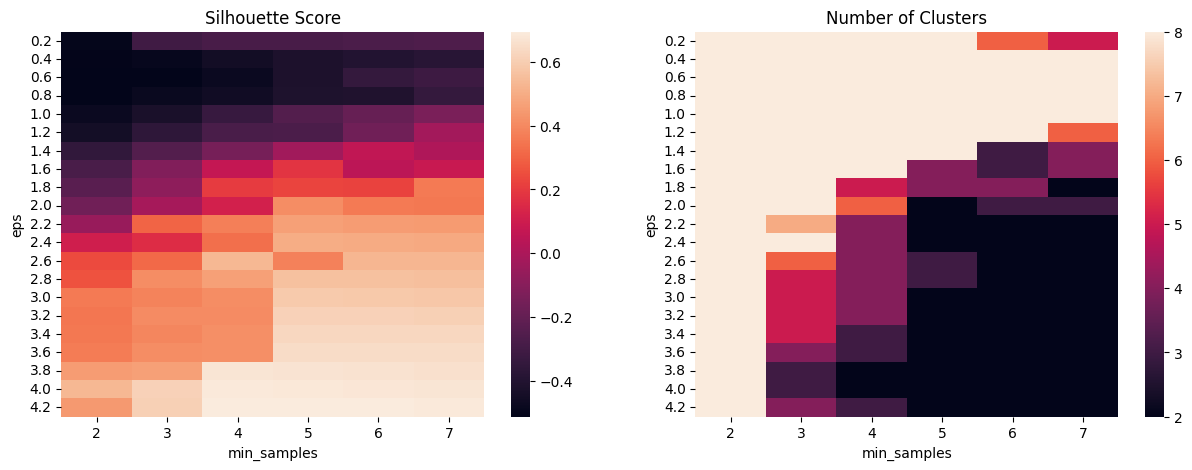

In [36]:
dbscan_silhouette_df = pd.DataFrame(data=silhouette_scores, index=eps_values, columns=min_samples_values)
dbscan_num_clusters_df = pd.DataFrame(data=num_clusters, index=eps_values, columns=min_samples_values)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.heatmap(dbscan_silhouette_df, ax=axes[0])
axes[0].set_title("Silhouette Score")
axes[0].set_xlabel("min_samples")
axes[0].set_ylabel("eps")
sns.heatmap(dbscan_num_clusters_df, ax=axes[1], vmax=8)
axes[1].set_title("Number of Clusters")
axes[1].set_xlabel("min_samples")
axes[1].set_ylabel("eps")
plt.show()

From the plots, we can observe the complexity of the results from DBSCAN. By testing the many configurations, if we wanted more than two clusters (in reality it's one cluster, and the other one is noise), the other configurations would give more clusters, but that contain very few observations.

In [37]:
dbscan = DBSCAN(eps=4.2, min_samples=7)
clusters = dbscan.fit_predict(shopEasy_scaledNumerical_df)
unique_clusters = np.unique(clusters)

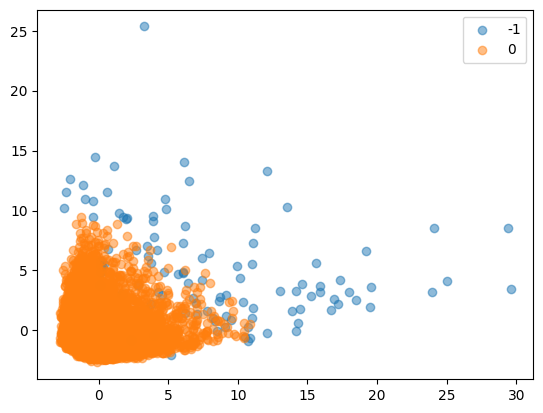

In [38]:
fig, ax = plt.subplots()
for cls in unique_clusters:
  class_indices = clusters == cls
  ax.scatter(principal_df.loc[class_indices, "PC1"], principal_df.loc[class_indices, "PC2"], alpha=0.5, label=str(cls))
ax.legend();

As mentioned before, and as evident by the tests and graphs, DBSCAN doesn't seem to be able to provide any useful results (at least, by itself). So, in the next section we compare the performance of K-Means against Hierachical Clustering, the only two models that gave decent results.

But, since DBSCAN seems to be able to quite well chose "outliers" or noise, which not necessarily means that they are actual outliers, removing those observations should allow us to make a better analysis later, focusing more on identifying the similarities between the clusters (and not getting lost by the more extreme observations), which is the objective of the project.

If it was a classification problem, then we would not remove those observations, but since our objective is not predicting, but finding groups and the similarities between its members, the removal of outliers will allow us to see more clearly the similarities.

## 3.4. Performance Comparison

In [39]:
print(f"The Silhouette score for K-means clustering is:{round(silhouette_score(shopEasy_scaledNumerical_df, predicted_classes),3)}")
print(f"The Silhouette score for Hierarchical clustering is:{round(silhouette_score(shopEasy_scaledNumerical_df, lbl_predicted),3)}")

The Silhouette score for K-means clustering is:0.231
The Silhouette score for Hierarchical clustering is:0.18


The results indicate that K-means segments the observations more accurately than Hierarchical clustering, as evidenced by its lower silhouette score.

In [40]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_index = adjusted_rand_score(predicted_classes, lbl_predicted)

print(f"The agreement between the two models is equal to {round(adjusted_rand_index, 3)}")

The agreement between the two models is equal to 0.161


The two models partition similarly approximately 16% of the total number of observation pairs, indicating a moderate level of agreement between the K-means and Hierarchical clustering methods. 

This level of agreement suggests that while there is some overlap in how the two models group the data, there are also significant differences in their clustering results. 

This could imply that the models capture different underlying structures within the data or that one method is more sensitive to certain features than the other. 

## 3.5.  DBSCAN + K-Means++

In [41]:
dbscan = DBSCAN(eps=3.8, min_samples=5)
clusters = dbscan.fit_predict(shopEasy_scaledNumerical_df)
scaled_df = pd.DataFrame(shopEasy_scaledNumerical_df)

shopEasy_noiseless = pd.DataFrame(shopEasy_scaledNumerical_df.copy())

shopEasy_noiseless['dbscan_cluster'] = clusters

shopEasy_noiseless_df = scaled_df[(shopEasy_noiseless['dbscan_cluster'] == 0)]

In [42]:
k_means_scores_df = pd.DataFrame(columns=['k', 's_score', 'wcss_score'])

for k in range(2,21):
  current_silhouette_all = []
  current_wcss_all = []
  for n in range(1,11):
    model = KMeans(n_clusters = k, init='random', n_init = 'auto')
    model.fit(shopEasy_noiseless_df)
    predicted_classes = model.labels_
    current_wcss_all.append(model.inertia_)
    current_silhouette_all.append(silhouette_score(shopEasy_noiseless_df, predicted_classes))
  results = pd.DataFrame({'k': [k], 's_score': [sum(current_silhouette_all)/10], 'wcss_score': [sum(current_wcss_all)/10]})
  k_means_scores_df = pd.concat([k_means_scores_df, results], ignore_index=True)

In [43]:
k_means_scores_df.set_index('k', inplace=True)

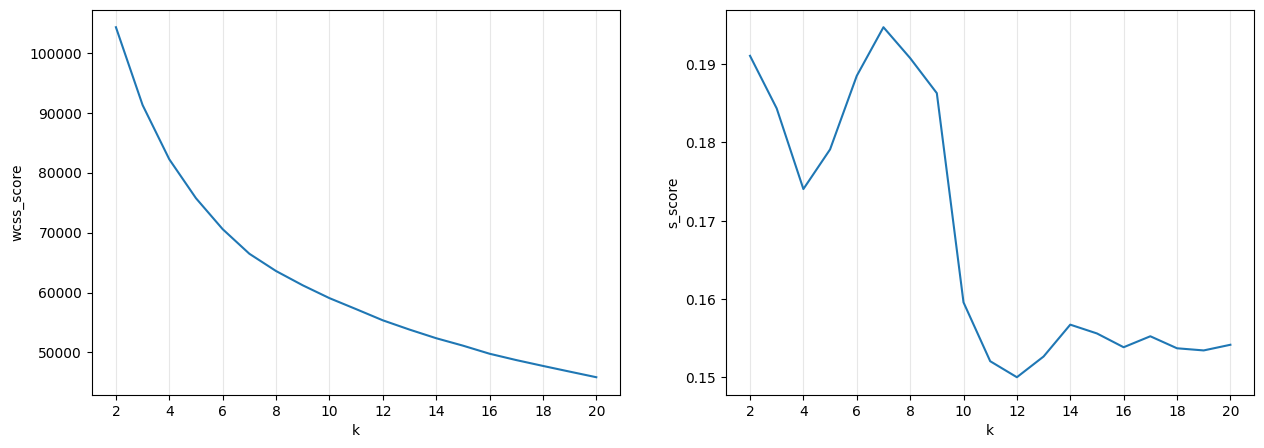

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.lineplot(data=k_means_scores_df, x='k', y='wcss_score', ax=axes[0])
axes[0].set_xticks(ticks=range(2,21,2))
axes[0].grid(axis='x', alpha=0.3)
sns.lineplot(data=k_means_scores_df, x='k', y='s_score')
axes[1].set_xticks(ticks=range(2,21,2))
axes[1].grid(axis='x', alpha=0.3)
plt.show()

In [45]:
k = 7
model = KMeans(n_clusters=k, init='k-means++', n_init='auto')
model.fit(shopEasy_noiseless_df)
predicted_classes = model.labels_
unique_labels = np.unique(predicted_classes)

In [46]:
principal_df = pd.DataFrame(data=principal_components, columns = ["PC1", "PC2"])
principal_noiseless_df = principal_df.loc[(shopEasy_noiseless['dbscan_cluster'] == 0),]

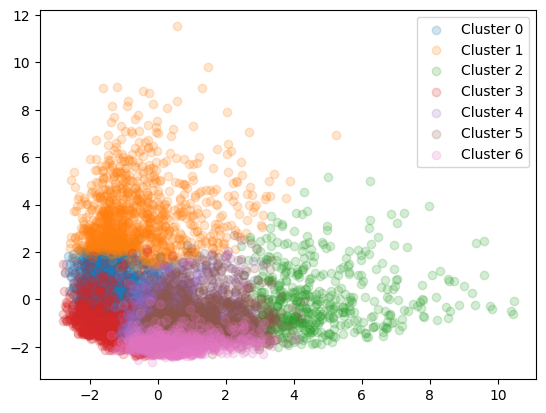

In [47]:
fig, ax = plt.subplots()
for cls in unique_labels:
  class_indices = predicted_classes == cls
  ax.scatter(principal_noiseless_df.loc[class_indices, "PC1"], principal_noiseless_df.loc[class_indices, "PC2"], alpha=0.2, label="Cluster "+str(cls))
ax.legend();
# ax.set_xlim([-2,10])
# ax.set_ylim([-2,10])

In [48]:
# PCA 3D Implementation
pca_3d = PCA(n_components=3)
principal_components_3d= pca_3d.fit_transform(shopEasy_noiseless_df)
principal_3d_df = pd.DataFrame(data=principal_components_3d, columns = ["PC1", "PC2", "PC3"])

In [49]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=principal_3d_df['PC1'],
    y=principal_3d_df['PC2'],
    z=principal_3d_df['PC3'],
    mode='markers',
    marker=dict(
        size=2,  # sets the marker size
        color=predicted_classes,  # sets the marker color
        opacity=0.5  # sets the marker opacity
    )
)])

fig.show()

# 4. Cluster Analysis

In [50]:
noiseless_nonscaled_df = shopEasy_df.loc[(clusters == 0),]

noiseless_nonscaled_df["clusters"] = predicted_classes

/var/folders/k4/tzrrs0b10b9g7npgkqvwbyr00000gn/T/ipykernel_70313/745822648.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
results = pd.DataFrame({})

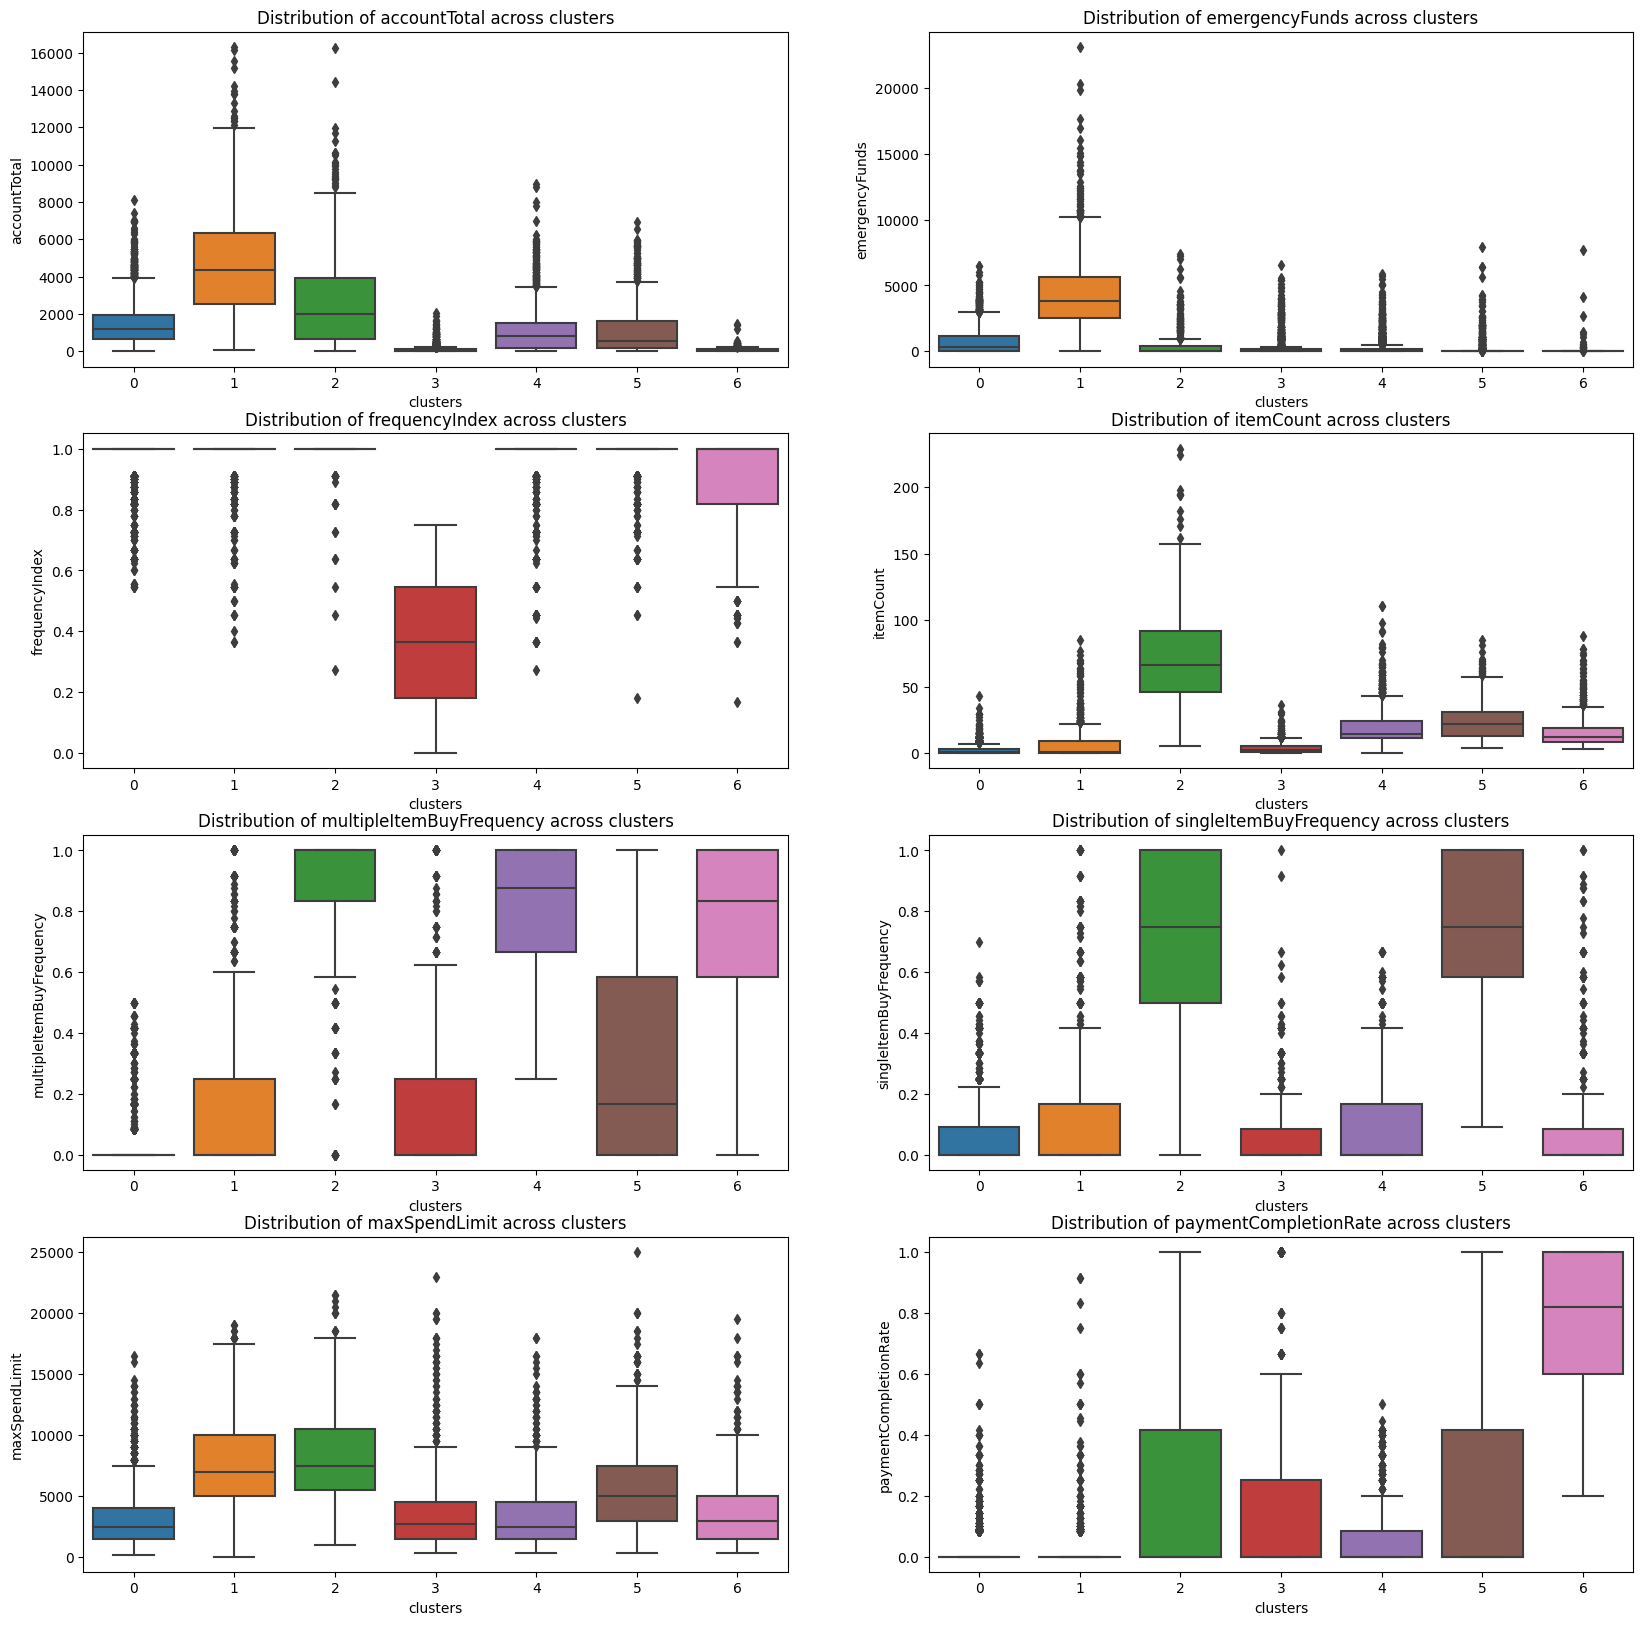

In [54]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20))

colStudy = ["accountTotal", "emergencyFunds", "frequencyIndex", "itemCount", "multipleItemBuyFrequency", "singleItemBuyFrequency", "maxSpendLimit", "paymentCompletionRate" ]
c = 0
j = 0
for i, col in enumerate(colStudy):
    if i%2 == 0 and i!=0:
        j+=1
    if c == 2:
        c = 0
    sns.boxplot(data=noiseless_nonscaled_df, y=col, x="clusters", ax=axes[j,c])
    axes[j,c].set_title(f"Distribution of {col} across clusters")
    c +=1